<center>
    <h1 style="color:green;">EDA</h1>
    <h2 style="color:green;">Project: Tour Recommendation System</h2>
</center>

<h3> Group : 1 (AMS-B)</h3>
<h3> Members: </h3><br>
1. Rith Chanthyda , ID: e20200612<br>
2. Phun Sreypich  , ID: e20200179<br>
3. Phai Ratha  , ID: e20200190<br>
4. Kry Senghort  , ID: e20200706<br>
5. Mengheab Vathanak  , ID: e20201145<br>
6. Rithy Vira  , ID: e20200978<br>

## 1.Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.neighbors import NearestNeighbors

## 2.Data Loading

In [2]:
# Load CSV file into a pandas dataframe
df = pd.read_csv('tour_data.csv')
df

,Index,Tour_Name,Tour_Type,Number_of_Reviewer,Rating,Duration,Price,Highlight,Location
0,1,Phare: The Cambodian Circus Show in Siem Reap,Comedy Shows,992.0,5.0,1,18.00,"Siem Reap's most original, authentic live perf...","Asia, Cambodia, Siem Reap Province, Siem Reap,..."
1,2,Khmer Gourmet Cooking Class,Cooking Classes,55.0,5.0,3,21.50,In-person guide,"Asia, Cambodia, Siem Reap Province, Siem Reap,..."
2,3,Koh Ker & Beng Mealea Full-Day Join-in Tour,Full-day Tours,288.0,5.0,10,50.00,"Cold towels & Bottled water, Professional Engl...","Asia, Cambodia, Siem Reap Province, Siem Reap,..."
3,4,"Kampot Day Tour ""Bokor National Park""",Adventure Tours,18.0,4.5,5,36.00,"Transportation: Tuk Tuk, English speaking driv...","Asia, Cambodia, Kampot Province, Kampot, Thing..."
4,5,Bike the Siem Reap Countryside with Local Expert,Adventure Tours,308.0,5.0,5,35.00,"Hotel pick up & Drop Off, Professional local E...","Asia, Cambodia, Siem Reap Province, Siem Reap,..."
...,...,...,...,...,...,...,...,...,...
4780,4781,Koh Khe Beng Mealea less crowded Private Tour,Museum Tickets & Passes,NaN,NaN,10,NaN,"English Speaking Tour guide, air conditioner c...","Siem Reap, Cambodia"
4781,4782,Special Angkor Sunrise & Sunset Tour,Full-day Tours,NaN,NaN,9,61.54,"English speaking tourist guide, Hotel pick up ...","Siem Reap, Cambodia"
4782,4783,Most Amazing Angkor Tour,Adventure Tours,1.0,5.0,12,NaN,Guided Tour,"Krong Siem Reap, Cambodia"
4783,4784,Amazing Koh Ker And Beng Mealea Tour,Full-day Tours,NaN,NaN,9,90.00,"English speaking tourist guide, Private transp...","Siem Reap, Cambodia"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4785 entries, 0 to 4784
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               4785 non-null   int64  
 1   Tour_Name           4785 non-null   object 
 2   Tour_Type           4783 non-null   object 
 3   Number_of_Reviewer  2095 non-null   float64
 4   Rating              2095 non-null   float64
 5   Duration            4785 non-null   int64  
 6   Price               4352 non-null   float64
 7   Highlight           4785 non-null   object 
 8   Location            4755 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 336.6+ KB


## 3.Data Cleaning

## Check Missing Value

In [4]:
print(df.isnull().sum())

Index                    0
Tour_Name                0
Tour_Type                2
Number_of_Reviewer    2690
Rating                2690
Duration                 0
Price                  433
Highlight                0
Location                30
dtype: int64


## Impute Missing Values of Numerical Data Type

Identify Numerical Features

In [5]:
numerical_features = df.select_dtypes(include = ['int64','float64']).columns.values
numerical_features

array(['Index', 'Number_of_Reviewer', 'Rating', 'Duration', 'Price'],
      dtype=object)

Declare an Instance

In [6]:
from sklearn.impute import KNNImputer
num_impute = KNNImputer()

Fit

In [7]:
df[numerical_features].head()

,Index,Number_of_Reviewer,Rating,Duration,Price
0,1,992.0,5.0,1,18.0
1,2,55.0,5.0,3,21.5
2,3,288.0,5.0,10,50.0
3,4,18.0,4.5,5,36.0
4,5,308.0,5.0,5,35.0


In [8]:
num_impute.fit(df[numerical_features])

KNNImputer()

Transform/Apply - df_data

In [9]:
df[numerical_features] = num_impute.transform(df[numerical_features])

In [10]:
print(df.isnull().sum())

Index                  0
Tour_Name              0
Tour_Type              2
Number_of_Reviewer     0
Rating                 0
Duration               0
Price                  0
Highlight              0
Location              30
dtype: int64


## Impute Missing Values of Category Data Type

Since there is only a small amount of missing value for category type, we decide to drop it.

In [11]:
df.dropna(subset=['Tour_Type'], inplace=True)
df.dropna(subset=['Location'], inplace=True)

## Final Check

In [12]:
print(df.isnull().sum())

Index                 0
Tour_Name             0
Tour_Type             0
Number_of_Reviewer    0
Rating                0
Duration              0
Price                 0
Highlight             0
Location              0
dtype: int64


In [13]:
df

,Index,Tour_Name,Tour_Type,Number_of_Reviewer,Rating,Duration,Price,Highlight,Location
0,1.0,Phare: The Cambodian Circus Show in Siem Reap,Comedy Shows,992.0,5.0,1.0,18.000,"Siem Reap's most original, authentic live perf...","Asia, Cambodia, Siem Reap Province, Siem Reap,..."
1,2.0,Khmer Gourmet Cooking Class,Cooking Classes,55.0,5.0,3.0,21.500,In-person guide,"Asia, Cambodia, Siem Reap Province, Siem Reap,..."
2,3.0,Koh Ker & Beng Mealea Full-Day Join-in Tour,Full-day Tours,288.0,5.0,10.0,50.000,"Cold towels & Bottled water, Professional Engl...","Asia, Cambodia, Siem Reap Province, Siem Reap,..."
3,4.0,"Kampot Day Tour ""Bokor National Park""",Adventure Tours,18.0,4.5,5.0,36.000,"Transportation: Tuk Tuk, English speaking driv...","Asia, Cambodia, Kampot Province, Kampot, Thing..."
4,5.0,Bike the Siem Reap Countryside with Local Expert,Adventure Tours,308.0,5.0,5.0,35.000,"Hotel pick up & Drop Off, Professional local E...","Asia, Cambodia, Siem Reap Province, Siem Reap,..."
...,...,...,...,...,...,...,...,...,...
4780,4781.0,Koh Khe Beng Mealea less crowded Private Tour,Museum Tickets & Passes,6.6,4.8,10.0,92.232,"English Speaking Tour guide, air conditioner c...","Siem Reap, Cambodia"
4781,4782.0,Special Angkor Sunrise & Sunset Tour,Full-day Tours,7.4,5.0,9.0,61.540,"English speaking tourist guide, Hotel pick up ...","Siem Reap, Cambodia"
4782,4783.0,Most Amazing Angkor Tour,Adventure Tours,1.0,5.0,12.0,92.232,Guided Tour,"Krong Siem Reap, Cambodia"
4783,4784.0,Amazing Koh Ker And Beng Mealea Tour,Full-day Tours,5.0,5.0,9.0,90.000,"English speaking tourist guide, Private transp...","Siem Reap, Cambodia"


## Check Duplicate Value

In [14]:
# select the column for which you want to check the number of duplicates
col_name = ['Tour_Name']

# count the number of duplicate values in the selected column
num_duplicates = df.duplicated(subset=col_name).sum()

# drop the duplicate rows
df.drop_duplicates(subset=col_name, inplace=True)

# print the number of duplicate values
print("Number of duplicate values in column {}: {}".format(col_name, num_duplicates))

# confirm the duplicates have been removed
print("Number of remaining rows after dropping duplicates: {}".format(len(df)))


Number of duplicate values in column ['Tour_Name']: 2164
Number of remaining rows after dropping duplicates: 2589


## Final Check

In [15]:
# select the column for which you want to check the number of duplicates
col_name = ['Tour_Name']

# count the number of duplicate values in the selected column
num_duplicates = df.duplicated(subset=col_name).sum()

# drop the duplicate rows
df.drop_duplicates(subset=col_name, inplace=True)

# print the number of duplicate values
print("Number of duplicate values in column {}: {}".format(col_name, num_duplicates))

Number of duplicate values in column ['Tour_Name']: 0


In [16]:
df.to_csv('Impute_data.csv', index=False)

## 3.Data Analysis

Understand the data distribution of Tour Type

In [17]:
counts = df['Tour_Type'].value_counts()
count_percentage = df['Tour_Type'].value_counts(1)*100
counts_df = pd.DataFrame({'Tour_Type':counts.index,'Counts':counts.values,'Percent':np.round(count_percentage.values,2)})
display(counts_df)
px.bar(data_frame=counts_df,
 x='Tour_Type',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Count of Items in Each Tour_Type')

,Tour_Type,Counts,Percent
0,Bus Tours,911,35.19
1,Full-day Tours,736,28.43
2,Adventure Tours,266,10.27
3,Half-day Tours,51,1.97
4,Multi-day Tours,50,1.93
...,...,...,...
63,Mixology Classes,1,0.04
64,Family-friendly Shows,1,0.04
65,Motorcycle Tours,1,0.04
66,Circuit Tours,1,0.04


In [18]:
column = 'Tour_Type'
counts = df[column].value_counts()
count_percentage = df[column].value_counts(1)*100
counts_df = pd.DataFrame({column:counts.index,'Counts':counts.values,'Percent':np.round(count_percentage.values,2)})
print('unique '+str(column))
print('Top 10 '+str(column))
display(counts_df.head(10))
print('Bottom 10 '+str(column))
display(counts_df.tail(10))
px.bar(data_frame=counts_df.head(10),
 x=column,
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Top 10 Tour Type based on Item Counts')

unique Tour_Type
Top 10 Tour_Type


,Tour_Type,Counts,Percent
0,Bus Tours,911,35.19
1,Full-day Tours,736,28.43
2,Adventure Tours,266,10.27
3,Half-day Tours,51,1.97
4,Multi-day Tours,50,1.93
5,Cooking Classes,50,1.93
6,Luxury Car Tours,48,1.85
7,Tuk Tuk Tours,43,1.66
8,Private and Luxury,43,1.66
9,Walking Tours,39,1.51


Bottom 10 Tour_Type


,Tour_Type,Counts,Percent
58,Sightseeing Passes,1,0.04
59,Aquariums,1,0.04
60,Japanese Lessons,1,0.04
61,Wine Tours,1,0.04
62,Nature Parks,1,0.04
63,Mixology Classes,1,0.04
64,Family-friendly Shows,1,0.04
65,Motorcycle Tours,1,0.04
66,Circuit Tours,1,0.04
67,Sightseeing Tours,1,0.04


Rating Analysis

count    2589.000000
mean        4.402858
std         0.741911
min         1.000000
25%         3.900000
50%         4.700000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64


<AxesSubplot: >

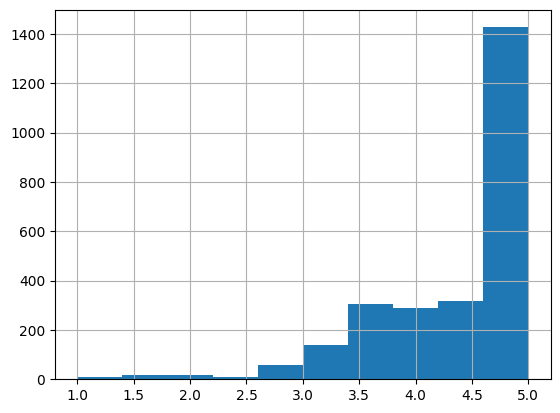

In [19]:
print(df['Rating'].describe())
df['Rating'].hist(bins=10)

We can see that histogram is skewed towards the right, which means that most of the Tours have a higher rating.

How many Ratings are between the interval of 0 to 1, 1 to 2, and so on?

In [20]:
pd.cut(df.Rating,bins = [0,1,2,3,4,5]).reset_index().groupby(['Rating']).size()

Rating
(0, 1]       6
(1, 2]      29
(2, 3]      88
(3, 4]     665
(4, 5]    1801
dtype: int64

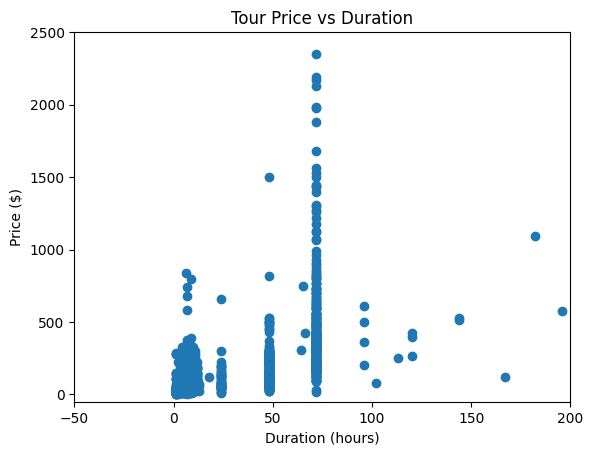

In [21]:
# create a scatter plot of tour price vs duration
plt.scatter(df['Duration'], df['Price'])
plt.xlabel('Duration (hours)')
plt.ylabel('Price ($)')
plt.title('Tour Price vs Duration')
plt.xlim([-50, 200]) # set x-axis range from 0 to 10
plt.ylim([-50, 2500]) # set y-axis range from 0 to 500
plt.show()

Base on this It show that there is some trend between duration and price, which mean that some of the tour price are low or high depend on the duration of the tour

## 3.Build a simple logic for recommendations based on popularity

In [22]:
def recommend_most_popular(col,col_value,top_n=5):
    return df[df[col]==col_value].sort_values(by='Rating',ascending = False).head(top_n)[['Tour_Name','Tour_Type','Rating', 'Number_of_Reviewer']]

In [23]:
recommend_most_popular(col='Tour_Type',col_value='Health Tours')

,Tour_Name,Tour_Type,Rating,Number_of_Reviewer
2951,Body Scrubâ€“ Special Treatments,Health Tours,5.0,13.0
3612,Lomi-Lomi Massage – Body Massage,Health Tours,5.0,16.0
3014,Four Hand Bliss (65 Mins) + Free Pick up or Dr...,Health Tours,3.5,3.0


In [24]:
recommend_most_popular(col='Tour_Type',col_value='Half-day Tours')

,Tour_Name,Tour_Type,Rating,Number_of_Reviewer
18,Private half day tours in Kampot with local tu...,Half-day Tours,5.0,5.0
2990,"Half Day Tour- Angkor Wat, Ta Promh, Bayon Temple",Half-day Tours,5.0,1.0
2471,The Killing Field and Toul Sleng Genocide Muse...,Half-day Tours,5.0,325.0
2617,Phnom Penh Nightâ€™s Life Walking and Foodie Tour,Half-day Tours,5.0,2.0
2630,Highlights & Hidden Gems With Locals: Best of ...,Half-day Tours,5.0,22.0


In [25]:
recommend_most_popular(col='Tour_Type',col_value='Adventure Tours')

,Tour_Name,Tour_Type,Rating,Number_of_Reviewer
4618,Quad Bike Ride Explore the Countryside,Adventure Tours,5.0,6.8
993,Angkor Wat Sunrise and Market Tour by Jeep,Adventure Tours,5.0,1.0
816,ATV Sunset and Cooking Class,Adventure Tours,5.0,2.0
821,Floating Village,Adventure Tours,5.0,2.0
825,Hike through the Jungles of Phnom Kulen Nation...,Adventure Tours,5.0,2.0


In [26]:
recommend_most_popular(col='Tour_Type',col_value='Food Tours')

,Tour_Name,Tour_Type,Rating,Number_of_Reviewer
9,Ultimate Siem Reap Food Tour (10 Locals Tastin...,Food Tours,5.0,31.0
294,Enjoy Authentic Khmer Dinner at Embassy Restau...,Food Tours,5.0,7.0
615,Lunch with an English-Speaking Local,Food Tours,5.0,6.0
820,Sunset Dinner at Rice Paddy Fields,Food Tours,5.0,2.0
1374,Luxury Camping,Food Tours,5.0,3.6


In [27]:
recommend_most_popular(col='Tour_Type',col_value='Full-day Tours')

,Tour_Name,Tour_Type,Rating,Number_of_Reviewer
2,Koh Ker & Beng Mealea Full-Day Join-in Tour,Full-day Tours,5.0,288.0
1065,Private Angkor Wat 1 Day Tour,Full-day Tours,5.0,1.0
1100,Private Battambang Off Beaten Track,Full-day Tours,5.0,1.0
1098,Private Battambang Full-Day Guided Tour,Full-day Tours,5.0,1.0
1094,Ancient Hindu Temples Of Preah Vihear,Full-day Tours,5.0,1.0


In [28]:
recommend_most_popular(col='Tour_Type',col_value='Comedy Shows')

,Tour_Name,Tour_Type,Rating,Number_of_Reviewer
0,Phare: The Cambodian Circus Show in Siem Reap,Comedy Shows,5.0,992.0
724,"The Cambodia Circus, Phare At 19:00 PM",Comedy Shows,5.0,3.0


## 3.Build a Content-based Recommendation System

In [29]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df2 = df.copy()
rmv_spc = lambda a: a.strip()
get_list = lambda a: list(map(rmv_spc, re.split('&|,|\*|n', a)))
for col in ['Tour_Name', 'Tour_Type', 'Highlight']:
    df2[col] = df2[col].apply(get_list)

def cleaner(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

for col in ['Tour_Name', 'Tour_Type', 'Highlight']:
    df2[col] = df2[col].apply(cleaner)

def couple(x):
    return ' '.join(x['Tour_Name']) + ' ' + ' '.join(x['Tour_Type']) + ' ' + ' '.join(x['Highlight'])

df2['product_classification_features'] = df2.apply(couple, axis=1)


In [30]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['product_classification_features'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim)

In [31]:
def content_recommendation_v1(title):
    a = df.copy().reset_index().drop('Index',axis=1)
    if a.empty:
        print("Error: The dataframe is empty!")
        return None
    index = a[a['Tour_Name']==title].index
    if len(index) == 0:
        print("Error: The title '{}' does not exist in the dataframe.".format(title))
        return None
    index = index[0]
    top_n_index = list(cosine_sim_df[index].nlargest(10).index)
    try:
        top_n_index.remove(index)
    except:
        pass
    similar_df = a.iloc[top_n_index][['Tour_Name']]
    similar_df['cosine_similarity'] = cosine_sim_df[index].iloc[top_n_index]
    return similar_df

In [32]:
title = 'Cooking class in Kampot'
content_recommendation_v1(title)

,Tour_Name,cosine_similarity
1134,Cooking Class and Local Market Tour,0.589256
115,Cooking Class at La Plantation,0.555556
1568,Cooking Class Menu A,0.555556
1831,Cooking Class + Visit Local Market,0.555556
2147,Cooking Class Menu C,0.555556
1029,Cooking Class By Borei Angkor,0.549972
2170,"Cook & Dine, enjoy the most unique experience",0.481457
1026,Market Tour and Cambodian Cooking Class in Sie...,0.464207
517,Cooking Class By Reveal Angkor Hotel Siem Reap,0.449050


In [33]:
title = 'Private Angkor Wat Sunrise Tour'
content_recommendation_v1(title)

,Tour_Name,cosine_similarity
1511,Angkor Wat Sunrise Private Tour,0.839146
1779,Full-Day Angkor Wat Sunrise Private Tour,0.812500
1495,Angkor Park Sunrise Private Tour,0.774597
683,Angkor Wat Sunrise Private Tour - Free Hotel P...,0.766032
247,Sun Rise Angkor Small Group Day Tour from Siem...,0.649519
1087,1-Day Angkor Temple Small Group Day Tour,0.603023
1079,Phnom Penh Full day private Tour,0.577350
2492,Angkor Wat Tour from Siem Reap Private,0.577350
908,Temples with Sunrise Adventure- Private Tour,0.573539


In [34]:
title = 'Sunset Cruise on Tonle Sap'
content_recommendation_v1(title)

,Tour_Name,cosine_similarity
288,Guided Floating Village Boat Tour in Siem Reap,0.450000
802,Day Trip to Beng Mealea Temple and Kampong Khl...,0.429669
2287,Phnom Penh Sunset Cruise Including BBQ and Drinks,0.409197
2106,Private Two Day Tour to Temples & Tonle Sap,0.356915
245,Private City Tour in Siem Reap,0.350000
863,Private 3 Day Adventure To Ancient Temples,0.346410
1282,4-day Phnom Penh Siem Reap Angkor temples Floa...,0.344652
1989,2-Day Siem Reap Angkor Complex and Floating vi...,0.344010
344,Private Tour: Siem Reap City Tour Full Day,0.342356


In [35]:
title = 'Khmer Gourmet Cooking Class'
content_recommendation_v1(title)

,Tour_Name,cosine_similarity
1831,Cooking Class + Visit Local Market,0.544331
2092,Khmer Culinary Cooking Class,0.462910
1134,Cooking Class and Local Market Tour,0.433013
2374,Evening Cooking Class,0.433013
1882,Khmer Gourmet Degustation,0.408248
74,Cooking class in Kampot,0.408248
115,Cooking Class at La Plantation,0.408248
1568,Cooking Class Menu A,0.408248
2147,Cooking Class Menu C,0.408248


In [36]:
title = 'Bike the Siem Reap Countryside with Local Expert'
content_recommendation_v1(title)

,Tour_Name,cosine_similarity
2313,Angkor Sunrise Bike Tour with Breakfast and Lu...,0.621874
144,Siem Reap Countryside Sunset Ride,0.550689
1550,Angkor Sunrise Bike Tour with Breakfast & Lunch,0.515122
1288,Angkor Sunrise Bike Tour - Included Breakfast ...,0.504715
2382,Morning Countryside Jeep Tour,0.440204
110,Siem Reap Countryside Half-Day Shared Tour,0.414644
361,Half-Day Siem Reap Countryside Bike Tour,0.414644
2552,Killing Field & Paddy Rice Fields Bike Ride,0.391293
1241,Siem Reap Countryside Bicycle Tour 4 hours,0.389490


In [38]:
from fuzzywuzzy import fuzz, process

def content_recommendation_v2(partial_title):
    a = df.copy().reset_index().drop('Index', axis=1)
    if a.empty:
        print("Error: The dataframe is empty!")
        return None
    # Find the closest match to the partial title using fuzzy string matching
    titles = a['Tour_Name'].unique()
    match = process.extractOne(partial_title, titles, scorer=fuzz.token_sort_ratio)
    if match is None or match[1] < 50:
        print("Error: No match found for the title '{}'".format(partial_title))
        return None
    title = match[0]
    index = a[a['Tour_Name']==title].index[0]
    top_n_index = list(cosine_sim_df[index].nlargest(10).index)
    try:
        top_n_index.remove(index)
    except:
        pass
    similar_df = a.iloc[top_n_index][['Tour_Name']]
    similar_df['cosine_similarity'] = cosine_sim_df[index].iloc[top_n_index]
    return similar_df

c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning



In [39]:
title = 'Tuk Tuk Tour'
content_recommendation_v2(title)

,Tour_Name,cosine_similarity
1060,Full-Day Kampot & Kep with a local Tuk Tuk Tours,0.519656
597,MotoGirl - Day Tour,0.495074
286,"Tuk-Tuk full day tour BambooTrain , bat cave,l...",0.471405
2542,Private Full Day Tuk Tuk Tour in Battambang,0.471405
1083,Sightseeing and History Tour in Phnom Penh,0.461880
519,Small Group Phnom Penh Full Day City Tour with...,0.456435
30,Battambang Full Day Tour from Siem Reap - Bamb...,0.439941
1183,Angkor Full Day Private Tour with 2 Extra,0.436436
125,Phnom Penh Nightlife Street Food Tours,0.435194


In [40]:
from fuzzywuzzy import fuzz, process

def content_recommendation_v3(partial_title):
    a = df.copy().reset_index().drop('Index', axis=1)
    if a.empty:
        print("Error: The dataframe is empty!")
        return None
    # Find the closest match to the partial title using fuzzy string matching
    titles = a['Highlight'].unique()
    match = process.extractOne(partial_title, titles, scorer=fuzz.token_sort_ratio)
    if match is None or match[1] < 50:
        print("Error: No match found for the title '{}'".format(partial_title))
        return None
    title = match[0]
    index = a[a['Highlight']==title].index[0]
    top_n_index = list(cosine_sim_df[index].nlargest(10).index)
    try:
        top_n_index.remove(index)
    except:
        pass
    similar_df = a.iloc[top_n_index][['Highlight']]
    similar_df['cosine_similarity'] = cosine_sim_df[index].iloc[top_n_index]
    return similar_df

In [41]:
title = 'Private tour, Transport by air-conditioned private vehicle, Lunch, Professional guide,'
content_recommendation_v2(title)

,Tour_Name,cosine_similarity
1859,2-day explore mystery Angkor temples - Private...,0.418121
1606,"Private Discovery of Banteay Srei, Beng Mealea...",0.400320
289,Half-Day Ta Prohm and Banteay Kdei Tour,0.384615
1653,Private One Day Trip-Pyramid Temple Koh Ker an...,0.384615
2158,Private One Day to Kulen Mountain and Kompong ...,0.384615
2533,Phnom Kulen mountain Waterfall & 1000 lingas f...,0.381771
459,The Magnificent Angkor Wat,0.370625
2166,Private One Day Exploration at Thousands of Li...,0.370625
1463,Private Bicycle journey in the Temples,0.350823


In [42]:
from fuzzywuzzy import fuzz, process

def content_recommendation_v4(partial_title):
    a = df.copy().reset_index().drop('Index', axis=1)
    if a.empty:
        print("Error: The dataframe is empty!")
        return None
    # Find the closest match to the partial title using fuzzy string matching
    titles = a['Tour_Name'].unique()
    match = process.extractOne(partial_title, titles, scorer=fuzz.token_sort_ratio)
    if match is None or match[1] < 50:
        print("Error: No match found for the title '{}'".format(partial_title))
        return None
    title = match[0]
    index = a[a['Tour_Name']==title].index[0]
    top_n_index = list(cosine_sim_df[index].nlargest(10).index)
    try:
        top_n_index.remove(index)
    except:
        pass
    similar_df = a.iloc[top_n_index][['Tour_Name', 'Rating', 'Number_of_Reviewer']]
    similar_df['cosine_similarity'] = cosine_sim_df[index].iloc[top_n_index]
    similar_df = similar_df.sort_values(['Rating', 'Number_of_Reviewer'], ascending=[False, False])
    return similar_df


In [43]:
title = 'Tuk Tuk Tour'
content_recommendation_v4(title)

,Tour_Name,Rating,Number_of_Reviewer,cosine_similarity
519,Small Group Phnom Penh Full Day City Tour with...,5.0,8.0,0.456435
597,MotoGirl - Day Tour,5.0,4.0,0.495074
2542,Private Full Day Tuk Tuk Tour in Battambang,4.7,5.8,0.471405
30,Battambang Full Day Tour from Siem Reap - Bamb...,4.5,21.0,0.439941
1183,Angkor Full Day Private Tour with 2 Extra,4.1,1.2,0.436436
125,Phnom Penh Nightlife Street Food Tours,4.0,4.0,0.435194
1083,Sightseeing and History Tour in Phnom Penh,3.6,1.8,0.461880
1060,Full-Day Kampot & Kep with a local Tuk Tuk Tours,3.5,2.0,0.519656
286,"Tuk-Tuk full day tour BambooTrain , bat cave,l...",3.5,1.8,0.471405


## <font color = yellow>Feature Engineering